## IMPORTING THE LIB



In [ ]:
import pandas as pd #useful for loading the dataset
import numpy as np #to perform array

## IMPORTING THE CSV FILE

In [2]:
df=pd.read_csv("/content/drive/MyDrive/salary.csv")

## INTIAL READING


In [3]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:
df.tail()


,age,education.num,capital.gain,hours.per.week,income
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K
32560,22,9,0,20,<=50K


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [6]:
df.isnull()


,age,education.num,capital.gain,hours.per.week,income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
32556,False,False,False,False,False
32557,False,False,False,False,False
32558,False,False,False,False,False
32559,False,False,False,False,False


In [9]:
df.isnull().sum()


,0
age,0
education.num,0
capital.gain,0
hours.per.week,0
income,0


In [8]:
df.duplicated(

)


,0
0,False
1,False
2,False
3,False
4,False
...,...
32556,True
32557,False
32558,True
32559,True


In [10]:
df.columns


Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [11]:
df['hours.per.week'].value_counts(

)

,count
hours.per.week,
40,15217
50,2819
45,1824
60,1475
35,1297
...,...
94,1
82,1
92,1


In [21]:
df['hours.per.week']

,hours.per.week
0,40
1,18
2,40
3,40
4,40
...,...
32556,40
32557,38
32558,40
32559,40


In [13]:
df['age'].value_counts()



,count
age,
36,898
31,888
34,886
23,877
35,876
...,...
83,6
88,3
85,3


In [15]:
print(df['age'].max())
print(df['age'].min())

90
17


In [18]:
df['education.num'].value_counts()

,count
education.num,
9,10501
10,7291
13,5355
14,1723
11,1382
7,1175
12,1067
6,933
4,646


In [19]:
df['income']

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,<=50K
32558,>50K
32559,<=50K


In [20]:
df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [24]:
df['capital.gain']

,capital.gain
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [23]:
df['capital.gain']
print(df['capital.gain'].value_counts())

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64


## DATA PRE PROCESSING

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
df['income']

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,<=50K
32558,>50K
32559,<=50K


In [30]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['age', 'education.num', 'capital.gain', 'hours.per.week']] = scaler.fit_transform(df[['age', 'education.num', 'capital.gain', 'hours.per.week']])

In [31]:
label_encoder = LabelEncoder()
df_scaled['income_encoded'] = label_encoder.fit_transform(df['income'])

In [32]:
df_scaled['income_encoded']

,income_encoded
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [33]:
Q1 = df['capital.gain'].quantile(0.25)
Q3 = df['capital.gain'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers in the 'capital.gain' column
outliers = df[(df['capital.gain'] < lower_bound) | (df['capital.gain'] > upper_bound)]

# Display the number of outliers and some examples
print(f'Number of outliers: {outliers.shape[0]}')
print(outliers.head())

Number of outliers: 2712
      age  education.num  capital.gain  hours.per.week income  income_encoded
1519   54             15         99999              60   >50K               1
1520   52              9         99999              40   >50K               1
1521   53              9         99999              40   >50K               1
1522   52             13         99999              50   >50K               1
1523   46             15         99999              60   >50K               1


In [48]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # n_neighbors can be adjusted
df_scaled[['age', 'education.num', 'capital.gain', 'hours.per.week']] = imputer.fit_transform(df[['age', 'education.num', 'capital.gain', 'hours.per.week']])

# Now the 'capital.gain' outliers have been imputed with KNN
print(df_scaled.head())

    age  education.num  capital.gain  hours.per.week income  income_encoded
0  90.0            9.0           0.0            40.0  <=50K               0
1  82.0            9.0           0.0            18.0  <=50K               0
2  66.0           10.0           0.0            40.0  <=50K               0
3  54.0            4.0           0.0            40.0  <=50K               0
4  41.0           10.0           0.0            40.0  <=50K               0


## Data Visualization


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


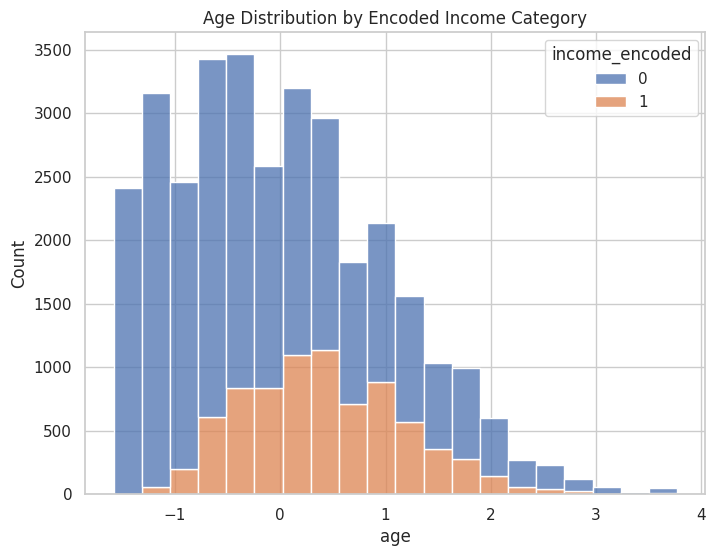

In [42]:

# Plot 1: Age distribution by encoded income category
plt.figure(figsize=(8, 6))
sns.histplot(data=df_scaled, x="age", hue="income_encoded", multiple="stack", bins=20)
plt.title('Age Distribution by Encoded Income Category')
plt.show()


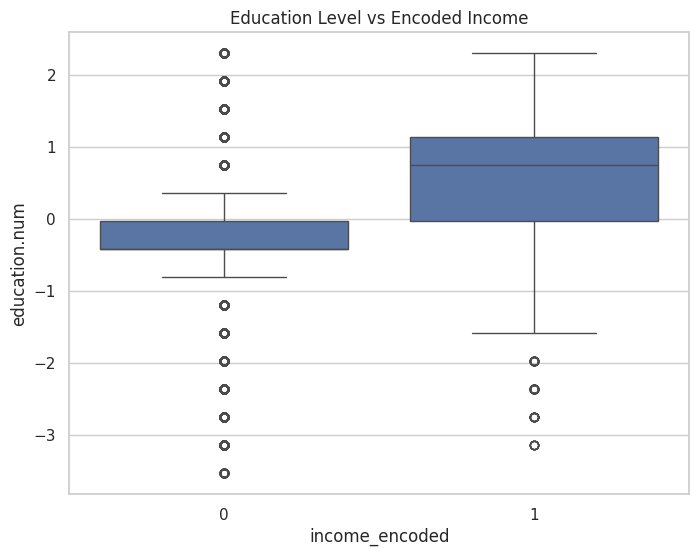

In [43]:

# Plot 2: Education level vs encoded income
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled, x="income_encoded", y="education.num")
plt.title('Education Level vs Encoded Income')
plt.show()

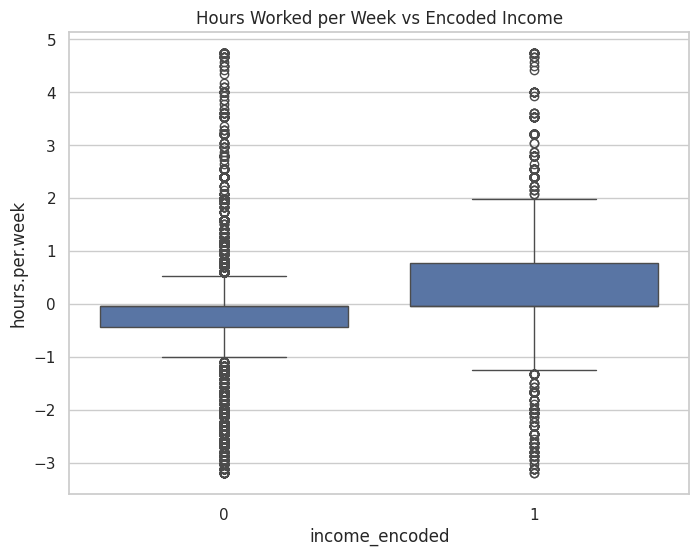

In [44]:
# Plot 3: Hours per week vs income
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled, x="income_encoded", y="hours.per.week")
plt.title('Hours Worked per Week vs Encoded Income')
plt.show()

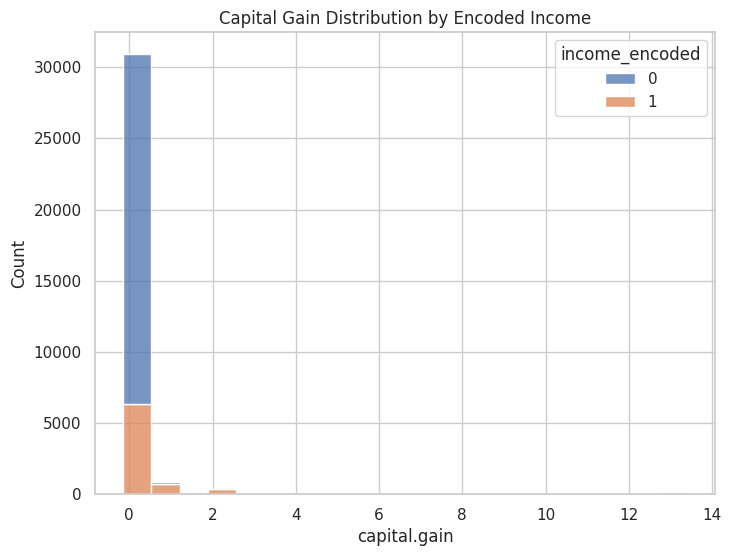

In [45]:
# Plot 4: Capital gain distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df_scaled, x="capital.gain", hue="income_encoded", multiple="stack", bins=20)
plt.title('Capital Gain Distribution by Encoded Income')
plt.show()

## Importing the **MODELS**

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score


## Data Splitting

In [51]:
X = df[['age', 'education.num', 'capital.gain', 'hours.per.week']]
y = df['income_encoded']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## TRAINING WITH THE KNN MODEL

In [53]:
knn = KNeighborsClassifier()

## with GRIDCV


In [64]:
knn = KNeighborsClassifier()

# Step 4: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],          # Testing different k values
    'weights': ['uniform', 'distance'],    # Weight options
    'p': [1, 2]                           # p=1 for Manhattan, p=2 for Euclidean distance
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Step 5: Find the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Step 6: Train the KNN model with the best parameters
best_knn = grid_search.best_estimator_

# Step 7: Make predictions and evaluate
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.8215875940426839
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4976
           1       0.68      0.46      0.55      1537

    accuracy                           0.82      6513
   macro avg       0.76      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



14160    0
27048    0
28868    0
5667     0
7827     0
        ..
1338     0
24534    0
18080    1
10354    0
24639    1
Name: income_encoded, Length: 6513, dtype: int64 [0 0 0 ... 1 0 1]


## WITH MANUAL TESTING DONE

In [56]:
# def evaluate_knn(n_neighbors, weights, p):
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)

#     # Perform 5-fold cross-validation on training set
#     cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     mean_cv_score = cv_scores.mean()

#     # Train on full training data and evaluate on test data
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     test_accuracy = accuracy_score(y_test, y_pred)

#     print(f"n_neighbors={n_neighbors}, weights={weights}, p={p} -> CV Accuracy: {mean_cv_score:.4f}, Test Accuracy: {test_accuracy:.4f}")
#     return test_accuracy

# # Test different combinations of hyperparameters manually
# evaluate_knn(n_neighbors=3, weights='uniform', p=2)  # Euclidean distance
# evaluate_knn(n_neighbors=5, weights='uniform', p=2)
# evaluate_knn(n_neighbors=9, weights='uniform', p=2)
# evaluate_knn(n_neighbors=3, weights='distance', p=2)
# evaluate_knn(n_neighbors=5, weights='distance', p=2)
# evaluate_knn(n_neighbors=7, weights='distance', p=2)

# # You can also try with Manhattan distance (p=1)
# evaluate_knn(n_neighbors=5, weights='distance', p=1)
# evaluate_knn(n_neighbors=5, weights='uniform', p=1)

n_neighbors=3, weights=uniform, p=2 -> CV Accuracy: 0.7996, Test Accuracy: 0.8041
n_neighbors=5, weights=uniform, p=2 -> CV Accuracy: 0.8033, Test Accuracy: 0.8092
n_neighbors=7, weights=uniform, p=2 -> CV Accuracy: 0.8085, Test Accuracy: 0.8225
n_neighbors=3, weights=distance, p=2 -> CV Accuracy: 0.7970, Test Accuracy: 0.8013
n_neighbors=5, weights=distance, p=2 -> CV Accuracy: 0.8005, Test Accuracy: 0.8056
n_neighbors=7, weights=distance, p=2 -> CV Accuracy: 0.8053, Test Accuracy: 0.8185
n_neighbors=5, weights=distance, p=1 -> CV Accuracy: 0.8002, Test Accuracy: 0.8055
n_neighbors=5, weights=uniform, p=1 -> CV Accuracy: 0.8030, Test Accuracy: 0.8096


0.8096115461384923

In [63]:
evaluate_knn(n_neighbors=9, weights='uniform', p=2)

n_neighbors=9, weights=uniform, p=2 -> CV Accuracy: 0.8122, Test Accuracy: 0.8227


0.8226623675725472

# PREDICTION RESULTS WITH VISUALIZATION

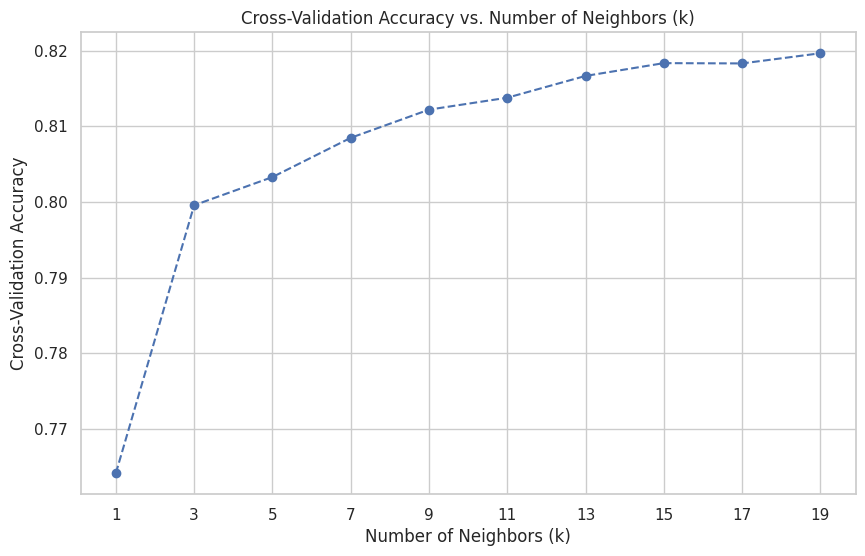

In [58]:
import matplotlib.pyplot as plt

# Create lists to store results
neighbors = list(range(1, 20, 2))  # Testing odd n_neighbors from 1 to 19
cv_scores = []  # Cross-validation scores

# Evaluate model for each number of neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.xticks(neighbors)
plt.show()
